ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for tensorflow
Index(['Year', 'Month', 'INFLOW ', 'RESERVOIR STORAGE ', 'EVAPORATION',
       'RESERVOIR LEVEL ', 'RELEASE (OUTFLOW)'],
      dtype='object')
Index(['Year', 'Month', 'INFLOW', 'RESERVOIR STORAGE', 'EVAPORATION',
       'RESERVOIR LEVEL', 'RELEASE (OUTFLOW)'],
      dtype='object')
     Year     Month   INFLOW  RESERVOIR STORAGE  EVAPORATION  RESERVOIR LEVEL  \
0  1989.0   January   613.89               2.53          5.1           484.22   
1     NaN  February   640.20               1.84         -9.2           477.17   
2     NaN     March   785.00               0.79        -19.8           462.44   
3     NaN     April  1005.60               0.45        -19.5           455.66   
4     NaN       May  1256.70               0.67     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6331324.0000 - val_loss: 3965794.7500
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6142214.5000 - val_loss: 3961602.5000
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5261758.5000 - val_loss: 3955095.5000
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6460667.5000 - val_loss: 3944043.2500
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6201069.0000 - val_loss: 3927474.5000
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5340489.5000 - val_loss: 3904066.2500
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5196576.0000 - val_loss: 3870016.0000
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6129951.5000 - val_loss: 3822311.5000
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5840425.5000 - val_loss: 3759675.0000
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4640666.5000 - val_loss: 3684829.7500
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0

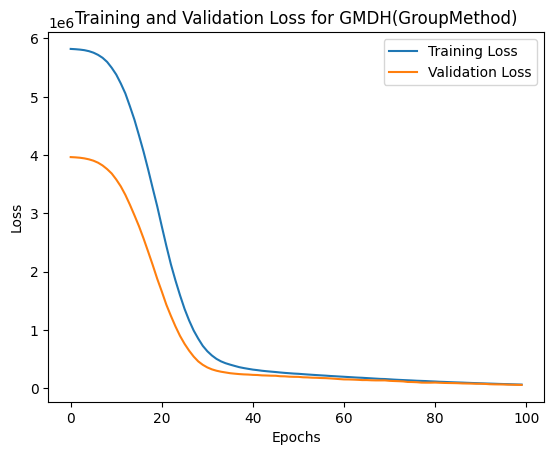

In [3]:
# Install required libraries (if needed)
!pip install pandas scikit-learn openpyxl matplotlib tensorflow

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_excel('./data/Dataset.xlsx', sheet_name='Scenario3')

# Check the columns to see what we have
print(data.columns)

data.columns = data.columns.str.strip()

# Print column names to check
print(data.columns)

# Select relevant columns for prediction
selected_columns = data[['INFLOW', 'RESERVOIR STORAGE', 'EVAPORATION', 'RESERVOIR LEVEL', 'RELEASE (OUTFLOW)']]

# Show the first few rows of the data to understand its structure
print(data.head())

# Features (X) and target variable (y)
X = data[['INFLOW', 'EVAPORATION', 'RESERVOIR LEVEL', 'RESERVOIR STORAGE', 'RELEASE (OUTFLOW)']]  # independent variables
y = data['RELEASE (OUTFLOW)']  # dependent variable (target)


# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Neural Network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (regression problem, so no activation function)
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, you can plot the training history (loss vs. epochs)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for GMDH(GroupMethod)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
